<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/Transfer_Learning_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learinig Fine-tuning

###We are going to get the Pretrained models within the **tf.keras.applications** module

In [89]:
## Getting the 10% data of food101

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zip_dir = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_dir.extractall()
zip_dir.close()

--2024-05-01 07:11:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  21.9MB/s    in 8.5s    

2024-05-01 07:11:23 (18.8 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [90]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

Here we are not using `ImageDataGeneratory` we are using `tf.keras.perprocessing.image_dataset_from_directory()` instead. and it is faster.

In [91]:
import tensorflow as tf
training_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 image_size=(224, 224),
                                                                 label_mode='categorical',
                                                                 batch_size=32,
                                                                 shuffle=True)

testing_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                   image_size=(224, 224),
                                                                   label_mode='categorical',
                                                                   batch_size=32,
                                                                   shuffle=True)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [92]:
class_names = training_data.class_names ## easy method
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [93]:
## see an exaple of batch data
for images, labels in training_data.take(1):
  print(images, labels)

tf.Tensor(
[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [4.66070976e+01 2.76070995e+01 0.00000000e+00]
   [4.80459785e+01 2.90459785e+01 5.71467757e-01]
   [5.69439697e+01 3.79439697e+01 7.94396973e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [4.79642410e+01 2.89642410e+01 1.14784211e-01]
   [5.27831955e+01 3.37831955e+01 3.78319502e+00]
   [5.57831421e+01 3.67831421e+01 6.78314209e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [4.91300774e+01 3.01300774e+01 2.14263916e-01]
   [5.59285965e+01 3.69285965e+01 6.92859745e+00]
   [5.37549706e+01 3.47549706e+01 4.75497007e+00]]

  ...

  [[0.00000000e+00 1.00000000e+00 0.00000000e+00]
   [0

In [94]:
pre_trained = tf.keras.applications.EfficientNetB0(input_shape=(224, 224, 3))

output_layer = tf.keras.layers.Dense(10, activation='softmax')

model = tf.keras.models.Sequential([
    pre_trained,
    output_layer
])

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1000)              5330571   
 )                                                               
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 5340581 (20.37 MB)
Trainable params: 5298558 (20.21 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


In [96]:
history = model.fit(training_data,
          epochs=5,
          validation_data=testing_data)

Epoch 1/5
24/24 [==============================] - 49s 553ms/step - loss: 2.2893 - accuracy: 0.2800 - val_loss: 2.2752 - val_accuracy: 0.2804
Epoch 2/5
24/24 [==============================] - 12s 496ms/step - loss: 2.2471 - accuracy: 0.5347 - val_loss: 2.2446 - val_accuracy: 0.4812
Epoch 3/5
24/24 [==============================] - 12s 504ms/step - loss: 2.2163 - accuracy: 0.6147 - val_loss: 2.2127 - val_accuracy: 0.5560
Epoch 4/5
24/24 [==============================] - 12s 474ms/step - loss: 2.1894 - accuracy: 0.6387 - val_loss: 2.2252 - val_accuracy: 0.4260
Epoch 5/5
24/24 [==============================] - 12s 485ms/step - loss: 2.1749 - accuracy: 0.5880 - val_loss: 2.2171 - val_accuracy: 0.4064


### Building Transfer Learning model_1 with the help of Keras Function API

In [97]:
## 1.Creating a Base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

## 2.Freeze the Base model
base_model.trainable = False

## 3.Create inputs for the layer
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='Input_layer')

## 4.If you're using ResNet50V2 we need to normalize the inputs
## x = tf.keras.layers.experimental.preprocessing.rescaling(1/255.)(inputs)

## 5.Pass Inputs to the model
x = base_model(inputs)
print(f'Shapes after passing inputs through base model {x.shape}')

## 6.Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f"Shapes after applying GloabalAveragePooling {x.shape}")

## 7.Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

## 8.Combine the inputs and the outputs into the model
model_1 = tf.keras.Model(inputs, outputs)

## 9.Compile the model

model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

Shapes after passing inputs through base model (None, 7, 7, 1280)
Shapes after applying GloabalAveragePooling (None, 1280)


In [98]:
## 10. fit the model
history_1 = model_1.fit(training_data,
                        epochs=5,
                        validation_data=testing_data)

Epoch 1/5
24/24 [==============================] - 17s 386ms/step - loss: 1.9033 - accuracy: 0.3947 - val_loss: 1.3249 - val_accuracy: 0.7224
Epoch 2/5
24/24 [==============================] - 7s 284ms/step - loss: 1.1100 - accuracy: 0.7640 - val_loss: 0.8778 - val_accuracy: 0.8192
Epoch 3/5
24/24 [==============================] - 7s 285ms/step - loss: 0.7888 - accuracy: 0.8307 - val_loss: 0.6996 - val_accuracy: 0.8484
Epoch 4/5
24/24 [==============================] - 8s 301ms/step - loss: 0.6482 - accuracy: 0.8480 - val_loss: 0.6131 - val_accuracy: 0.8548
Epoch 5/5
24/24 [==============================] - 8s 322ms/step - loss: 0.5476 - accuracy: 0.8813 - val_loss: 0.5598 - val_accuracy: 0.8568


In [99]:
model_1.evaluate(testing_data)

79/79 [==============================] - 5s 62ms/step - loss: 0.5598 - accuracy: 0.8568


[0.5598308444023132, 0.8568000197410583]

In [100]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 dense_3 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049571 (15.45 MB)
________________

In [101]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 rescaling_20 (Rescaling)    (None, None, None, 3)        0         ['input_11[0][0]']            
                                                                                                  
 normalization_10 (Normaliz  (None, None, None, 3)        7         ['rescaling_20[0][0]']        
 ation)                                                                                           
                                                                                                  
 rescaling_21 (Rescaling)    (None, None, None, 3)        0         ['normalization_1

In [102]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_11
1 rescaling_20
2 normalization_10
3 rescaling_21
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_acti

<Axes: >

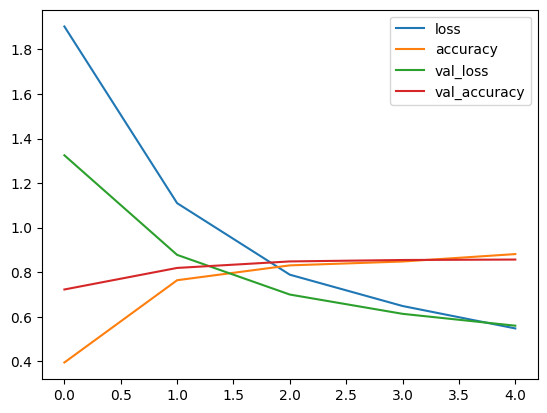

In [103]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

### Getting the feature vector from the trained model

Demonstrating GlobalAveragePooling2D layer

We have a tensor after our model goes through `base model` of shape (None, 7, 7, 1280).

But when we pass through `GlobalAveragePooling2D` layer, it turns into the shape of  (None, 1280).

### Building `model_2`: feature extraction transfer learninig model woth data augmentation and with 1% of food101 data

In [104]:
## Download and upzip the data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
zip_dir1 = zipfile.ZipFile('10_food_classes_1_percent.zip')
zip_dir1.extractall()
zip_dir1.close()

--2024-05-01 07:14:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M  22.4MB/s    in 6.8s    

2024-05-01 07:14:51 (18.9 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [105]:
## Creating training and testing data of 1% data
training_data_dir_1 = '/content/10_food_classes_1_percent/train'
testing_data_dir_1 = '/content/10_food_classes_1_percent/test'

####Preprocessing the data

In [106]:
import tensorflow as tf

training_data_1 = tf.keras.preprocessing.image_dataset_from_directory(directory=training_data_dir_1,
                                                                    label_mode='categorical',
                                                                    image_size=(224, 224),
                                                                    batch_size=32,
                                                                    shuffle=True)
testing_data_1 = tf.keras.preprocessing.image_dataset_from_directory(testing_data_dir_1,
                                                                   batch_size=32,
                                                                    image_size=(224, 224),
                                                                   label_mode='categorical',
                                                                   shuffle=True)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


####Adding Data augmentation right into the model

we can use `tf.keras.layers.experimental.preprocessing()`

In [107]:
from tensorflow.keras.layers.experimental import preprocessing

## Creating data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
], name='data_augmentation')


#### Visualizing the augmented images

(-0.5, 320.5, 583.5, -0.5)

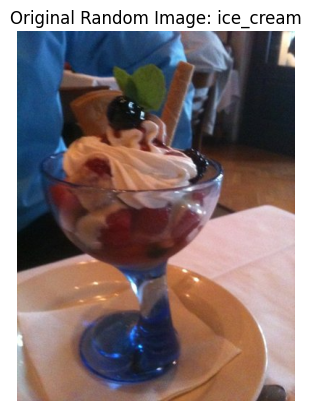

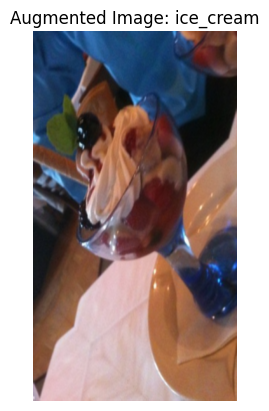

In [108]:
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import os
import random

target_class = random.choice(training_data_1.class_names)
target_dir = '/content/10_food_classes_1_percent/train' +'/'+ target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir +'/'+ random_image
image = mimg.imread(random_image_path)

##Ploting random image
plt.imshow(image)
plt.title(f"Original Random Image: {target_class}")
plt.axis(False)
plt.figure()

##Ploting random augmented image
augmented_image = data_augmentation(tf.expand_dims(image, axis=0))
augmented_image = tf.squeeze(augmented_image)/255.
plt.imshow(augmented_image)
plt.title(f"Augmented Image: {target_class}")
plt.axis(False)

#### Building model_2 with augmented data

In [109]:
input_shape = (224, 224, 3)

base_model_2 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_2.trainable=False

## Creating input layer
input_2 = tf.keras.layers.Input(shape=input_shape, name='input_layer')

## Adding data augmentation Sequential model as a layer
x = data_augmentation(input_2)

## Give base_model_2 the inputs (after augmentation)
x = base_model_2(x, training=False)

## Pool output features of the base model
x = tf.keras.layers.GlobalAveragePooling2D()(x)

## Put the Dense layer on as the output
output_2 = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

## Making the model using inputs and outputs
model_2 = tf.keras.Model(input_2, output_2)

## Compile the model
model_2.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [110]:
## Fit the model
history_2 = model_2.fit(training_data_1,
            epochs=5)

Epoch 1/5
3/3 [==============================] - 8s 439ms/step - loss: 2.3704 - accuracy: 0.1429
Epoch 2/5
3/3 [==============================] - 2s 688ms/step - loss: 2.0720 - accuracy: 0.3000
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9002 - accuracy: 0.3857
Epoch 4/5
3/3 [==============================] - 1s 442ms/step - loss: 1.7073 - accuracy: 0.5429
Epoch 5/5
3/3 [==============================] - 3s 680ms/step - loss: 1.5543 - accuracy: 0.6857


In [111]:
model_2.evaluate(testing_data_1)

79/79 [==============================] - 13s 119ms/step - loss: 1.8108 - accuracy: 0.4604


[1.8107739686965942, 0.4603999853134155]

In [137]:
import pandas as pd
pf.DataFrame(history_2.history).plot()

NameError: name 'pf' is not defined

### Model_3: Feature extraction transfer learning model with 10% of data and data augmentation

In [112]:
base_model_3 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model_3.trainable = False

input_3 = tf.keras.layers.Input(shape=(224, 224, 3), name='input layer')

x = data_augmentation(input_3)

x = base_model_3(x, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

output_3 = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(x)

model_3 = tf.keras.Model(input_3, output_3)

model_3.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy']
                )

In [113]:
model_3.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_4  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

#### Creating  ModelCheckPoint callback

the ModelCheckPoint callback intermediatly saves our model (the full model or just the weights) during training. This is useful so we can come and start where we left off.

In [114]:
## Set checkpoint path
checkpoint_path = '10%_model_checkpoint_weights/checkpoint.ckpt'

## Create a Model CheckPoint callback that stores only the model's weights
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                            save_weights_only = True,
                                            save_best_only = False,
                                            save_freq='epoch' ## Saves every epoch
                                            )

In [115]:
history_3 = model_3.fit(training_data,
            epochs=5,
            validation_data=testing_data,
            callbacks=[model_checkpoint])

Epoch 1/5
24/24 [==============================] - 23s 687ms/step - loss: 1.9718 - accuracy: 0.3333 - val_loss: 1.4172 - val_accuracy: 0.6696
Epoch 2/5
24/24 [==============================] - 16s 648ms/step - loss: 1.3010 - accuracy: 0.6973 - val_loss: 0.9766 - val_accuracy: 0.7944
Epoch 3/5
24/24 [==============================] - 14s 564ms/step - loss: 0.9977 - accuracy: 0.7587 - val_loss: 0.7884 - val_accuracy: 0.8136
Epoch 4/5
24/24 [==============================] - 14s 566ms/step - loss: 0.8112 - accuracy: 0.8027 - val_loss: 0.6791 - val_accuracy: 0.8412
Epoch 5/5
24/24 [==============================] - 13s 548ms/step - loss: 0.7216 - accuracy: 0.8333 - val_loss: 0.6185 - val_accuracy: 0.8444


In [116]:
model_3_evaluated = model_3.evaluate(testing_data)

79/79 [==============================] - 5s 63ms/step - loss: 0.6185 - accuracy: 0.8444


#### Loading in checkpointed weights
Loading in checkpointed weigths returns a model to a specific checkpoint

In [117]:
## loding in the saved weights
model_3.load_weights(checkpoint_path) ## overwrites the existing weights

In [118]:
## Evaluate model_3 with loaded weights
loaded_weights_model_results = model_3.evaluate(testing_data)

79/79 [==============================] - 7s 86ms/step - loss: 0.6185 - accuracy: 0.8444


In [119]:
## If the from our previous evaluated model_3 match the loaded weights then it's worked

model_3_evaluated == loaded_weights_model_results

False

In [120]:
model_3_evaluated

[0.6185083985328674, 0.8443999886512756]

In [121]:
loaded_weights_model_results

[0.618508517742157, 0.8443999886512756]

### Model_4: Fine-Tuning on existing model with 10% data

#### Let's check out the model_3 layers

In [122]:
model_3.layers

#### Let's checkout the training layers in model_3

In [123]:
for layer in model_3.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x78220099b2b0> True
<keras.src.engine.sequential.Sequential object at 0x782203fd3250> True
<keras.src.engine.functional.Functional object at 0x78206e24bc70> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7820833d0760> True
<keras.src.layers.core.dense.Dense object at 0x78206e3bdf90> True


#### Let's checkout the training layers in base_model_3

In [124]:
for i, layer in enumerate(model_3.layers):
  print(i, layer.name, layer.trainable)

0 input layer True
1 data_augmentation True
2 efficientnetb0 False
3 global_average_pooling2d_4 True
4 output_layer True


#### How many trainable veriable are there in the base_model_3 layers

In [125]:
print(len(model_3.layers[2].trainable_variables))

0


#### To bigin fine-tuning, Let's start by setting the last 10 layers of our base_model_3.trainable = True.

In [126]:
base_model_3.trainable=True

## Freeze all layers except the last 10
for layer in base_model_3.layers[:-10]:
  layer.trainable=False

## Recompile (we have to recompile our model everytime we make a change)

In [127]:
len(model_3.layers[2].trainable_variables)

10

#### Recompile (we have to recompile our model everytime we make a change)

In [128]:
model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(0.0001),
                ## reduce the learning rate for making pre_trained_layers trainable=True (otherwise will messup)
                metrics=['accuracy'])

**🔑Note:** When you use fine-tuning it's best practice to lower your learning rate by some amount. This is the hyperparameter that you can tune. prefered reducing 10x.

In [129]:
## Checking which layers are tunable (trainable)
for i, layer in enumerate(model_3.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_13 False
1 rescaling_24 False
2 normalization_12 False
3 rescaling_25 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze 

In [130]:
## Let's check out how many trainable veriables are there after Recompiling
print(len(model_3.trainable_variables))

12


In [131]:
## Fine-Tuning for another 5 epochs

history_4 = model_3.fit(training_data,
                        epochs=10, ## initially it was 5
                        validation_data=testing_data,
                        initial_epoch=history_3.epoch[-1] ## Starts training form previous last epoch
                        )

Epoch 5/10
24/24 [==============================] - 25s 659ms/step - loss: 0.6171 - accuracy: 0.8320 - val_loss: 0.4871 - val_accuracy: 0.8484
Epoch 6/10
24/24 [==============================] - 13s 555ms/step - loss: 0.4863 - accuracy: 0.8600 - val_loss: 0.4436 - val_accuracy: 0.8560
Epoch 7/10
24/24 [==============================] - 12s 498ms/step - loss: 0.4169 - accuracy: 0.8707 - val_loss: 0.4394 - val_accuracy: 0.8572
Epoch 8/10
24/24 [==============================] - 14s 546ms/step - loss: 0.3873 - accuracy: 0.8853 - val_loss: 0.4246 - val_accuracy: 0.8644
Epoch 9/10
24/24 [==============================] - 14s 576ms/step - loss: 0.3416 - accuracy: 0.9027 - val_loss: 0.4184 - val_accuracy: 0.8624
Epoch 10/10
24/24 [==============================] - 13s 509ms/step - loss: 0.3175 - accuracy: 0.9000 - val_loss: 0.4143 - val_accuracy: 0.8616


In [132]:
model_3.evaluate(testing_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.4143 - accuracy: 0.8616


[0.41431981325149536, 0.8615999817848206]

#### Comparing loss curves of model_3 and model_3 `fine-tuned`

<Axes: >

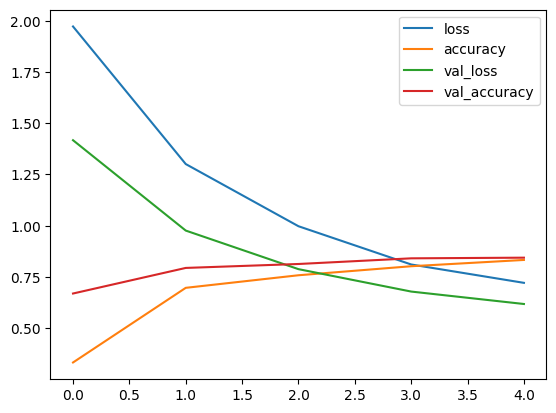

In [133]:
## Model_3 loss curve
import pandas as pd
pd.DataFrame(history_3.history).plot()

<Axes: >

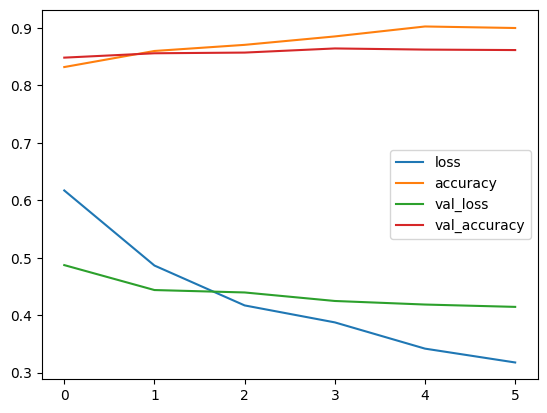

In [134]:
## Model_3 loss furve with fine-tuned
pd.DataFrame(history_4.history).plot()

### Model_5 Fine-tuning and existing model in all dataset

In [135]:
import zipfile
## Donwload and unzip the full data set of food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_all = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_all.extractall()
zip_all.close()

--2024-05-01 07:19:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 142.250.4.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  23.4MB/s    in 23s     

2024-05-01 07:19:51 (22.0 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [136]:
## setup train and test dir
train_all_dir = '10_food_classes_all_data/train'
test_all_dir = '10_food_classes_all_data/test'

train_data_all = tf.keras.preprocessing.image_dataset_from_directory(directory=train_all_dir,
                                                                     image_size=(224, 224),
                                                                     label_mode='categorical',
                                                                     batch_size=32,
                                                                     shuffle=True)
test_data_all = tf.keras.preprocessing.image_dataset_from_directory(test_all_dir,
                                                                    image_size=(224, 224),
                                                                    label_mode='categorical'
                                                                    batch_size=32,
                                                                    shuffle=True)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.
